<a href="https://colab.research.google.com/github/Ghostalp07/EDA/blob/main/housemarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/train (1).csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
train['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
isnull = train.isnull().sum()/len(train)*100
isnull = isnull[isnull>0]
isnull.sort_values(inplace=True, ascending=False)
isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

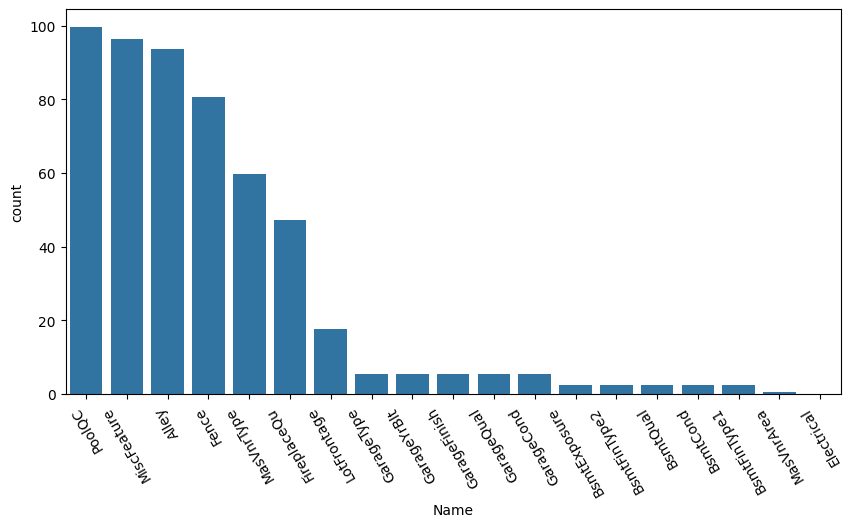

In [ ]:
isnull = isnull.to_frame()
isnull.columns = ['count']
isnull.index.names = ['Name']

isnull['Name']=isnull.index

plt.figure(figsize=(10,5))
sns.barplot(x='Name', y='count', data=isnull)
plt.xticks(rotation=120)
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

# split your features
categorical_none = [ 'Alley', 'Fence', 'FireplaceQu', 'GarageType',  'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual',
       'BsmtCond', 'BsmtFinType1']
numerical_mode =['Electrical']
numerical_mean=['LotFrontage']
numerical_zero = ['GarageYrBlt', 'MasVnrArea','GarageArea']

#imputers

none_imputer = SimpleImputer(strategy='constant', fill_value='None')
zero_imputer = SimpleImputer(strategy='constant', fill_value=0)
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent', fill_value='0')

#apply

train[categorical_none] = none_imputer.fit_transform(train[categorical_none])
train[numerical_zero] = zero_imputer.fit_transform(train[numerical_zero])
train[numerical_mean] = mean_imputer.fit_transform(train[numerical_mean])
train[numerical_mode] = mode_imputer.fit_transform(train[numerical_mode])

#drop PoolQc
train.drop('PoolQC', axis=1, inplace=True)


In [ ]:
isnull.isnull().sum()

count    0
Name     0
dtype: int64


 mu = 180921.20 and sigma = 79415.29



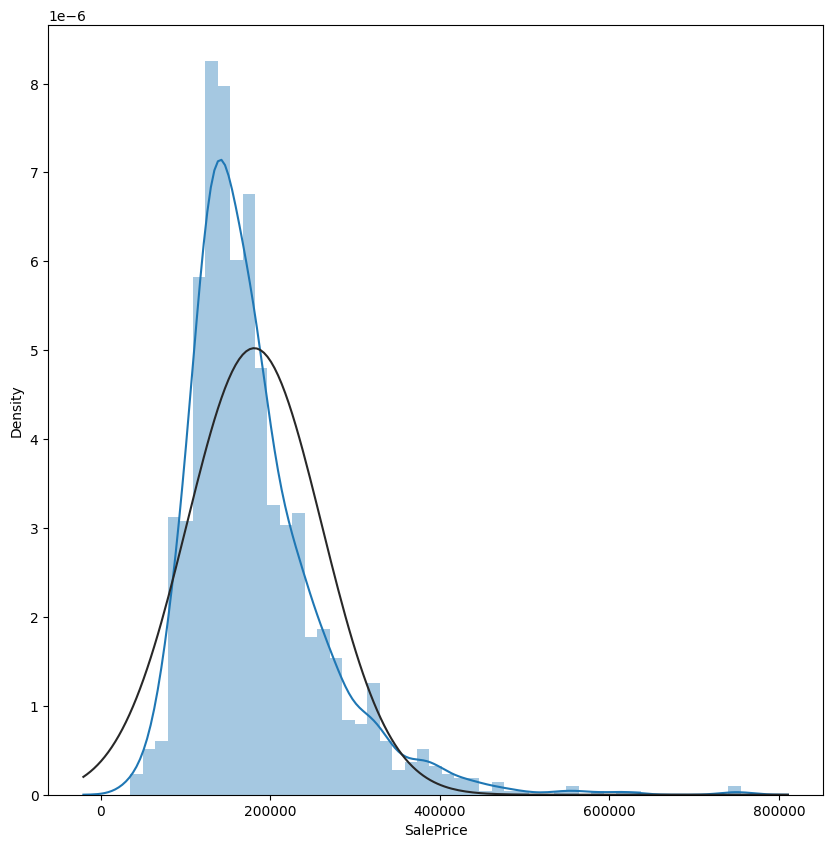

In [ ]:
from scipy import stats

plt.subplots(figsize=(10,10))
sns.distplot(train['SalePrice'],fit=stats.norm)

(mu, sigma) = stats.norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


Text(0, 0.5, 'Frequency')

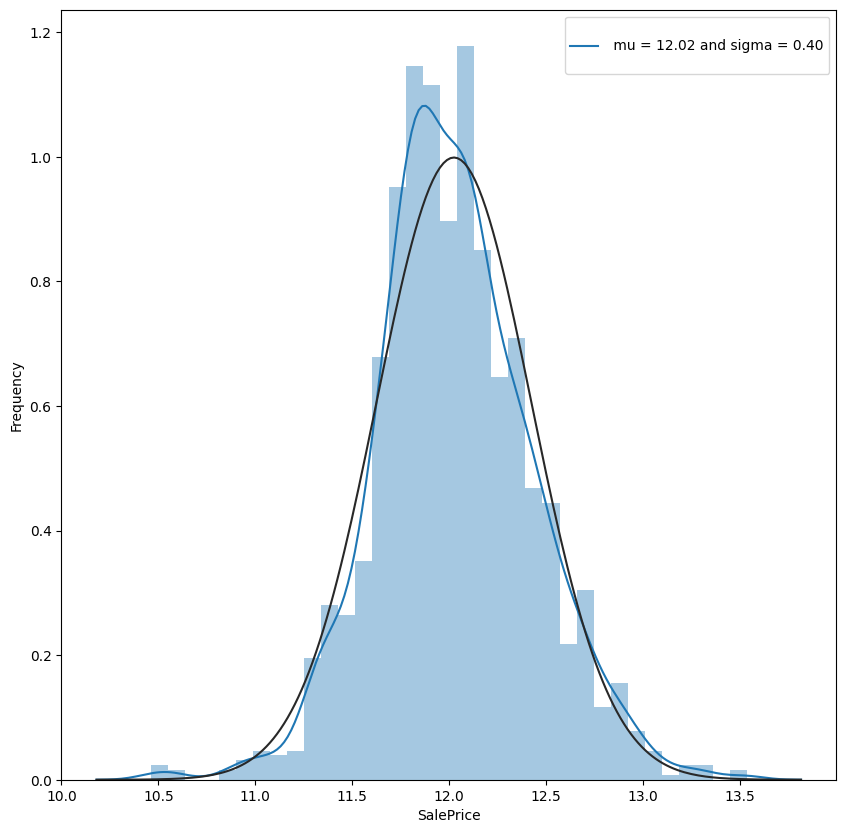

In [ ]:
train['SalePrice'] = np.log1p(train['SalePrice'])

plt.subplots(figsize=(10,10))
sns.distplot(train['SalePrice'],fit=stats.norm)

(mu,sigma) = stats.norm.fit(train['SalePrice'])
plt.legend([('\n mu = {:.2f} and sigma = {:.2f}\n').format(mu, sigma)],loc='best')
plt.ylabel('Frequency')

In [ ]:
catFeatures = [col for col in train.columns if col in train.columns if col in
               train .select_dtypes(include='object').columns]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#iterating  ech col

for col in catFeatures:
  train[col] = le.fit_transform(train[col])

In [ ]:
corr = train.corr()
plt.figure(figsize=(100,100))
sns.heatmap(corr, annot=True)

<Axes: >

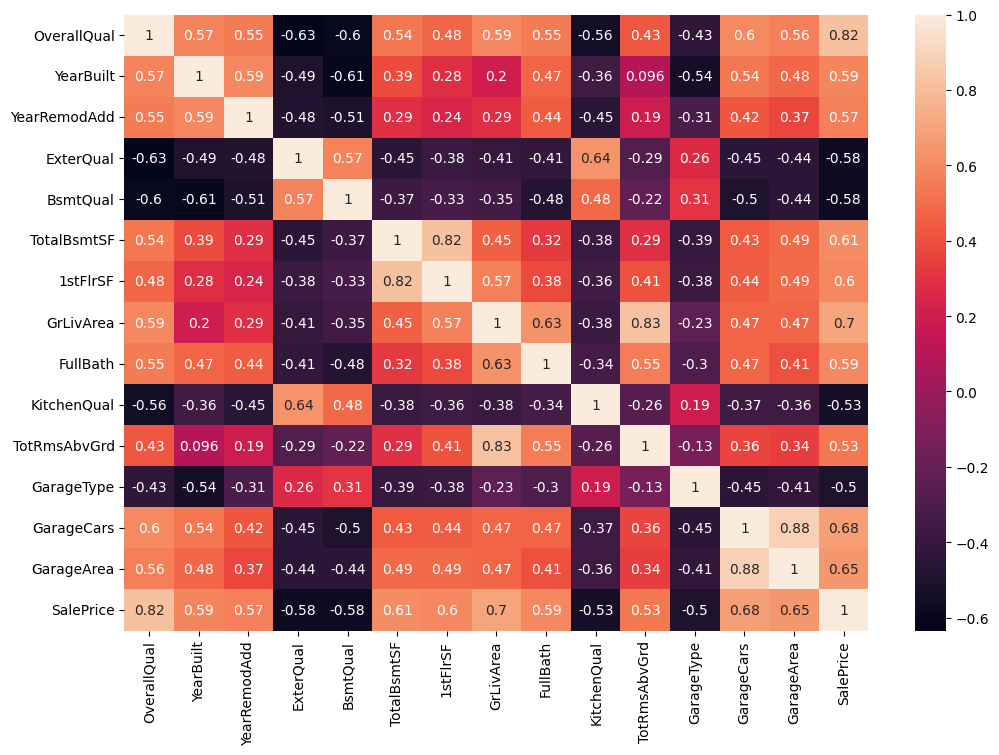

In [ ]:
thres =  (corr['SalePrice']>0.5) | (corr['SalePrice']<-0.5)
top_feature = corr.index[abs(thres)]

plt.subplots(figsize=(12,8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [ ]:
y = train['SalePrice']
X = train.drop(['SalePrice','Id'], axis=1).values
y=y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("predict value"+ str(model.predict([X_test[150]])))
print("real value"+ str(y_test[150]))

predict value[11.60788246]
real value11.83138646878959


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100,  max_depth=4)

GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)

print("predict value"+ str(GBR.predict([X_test[150]])))
print("real value"+ str(y_test[150]))

predict value[11.5908255]
real value11.83138646878959
